In [1]:
# Import Neeeded Liberaries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm

In [2]:
# Import Our Data
data = pd.read_csv("Thecleverprogrammer.csv")
data.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [4]:
# We need to convert Date column to datetime instead of object:
data["Date"] = pd.to_datetime(data["Date"], format = "%d/%m/%Y" )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


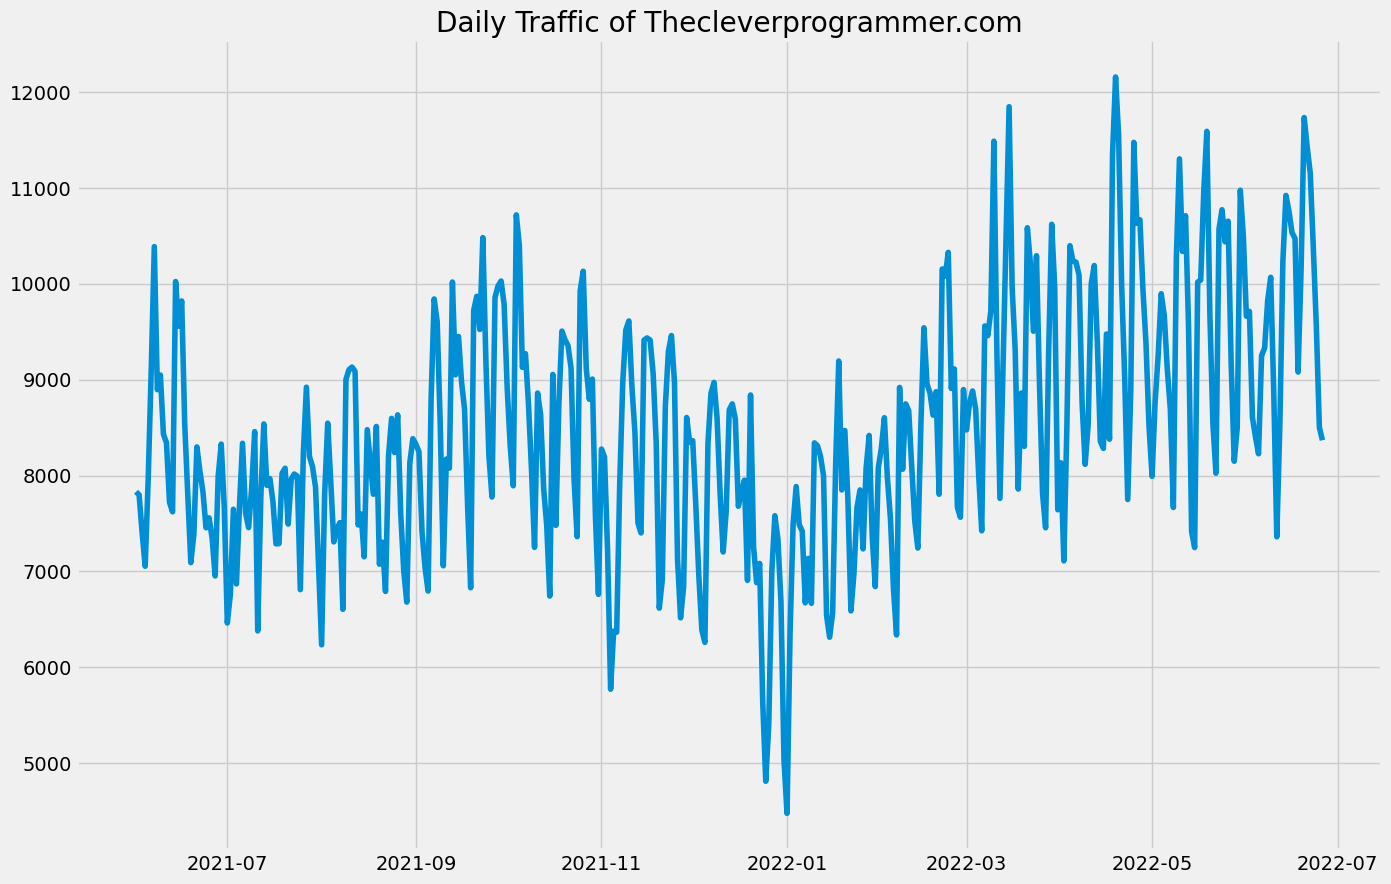

In [5]:
# Now lets take a look at the daily website traffic:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 640x480 with 0 Axes>

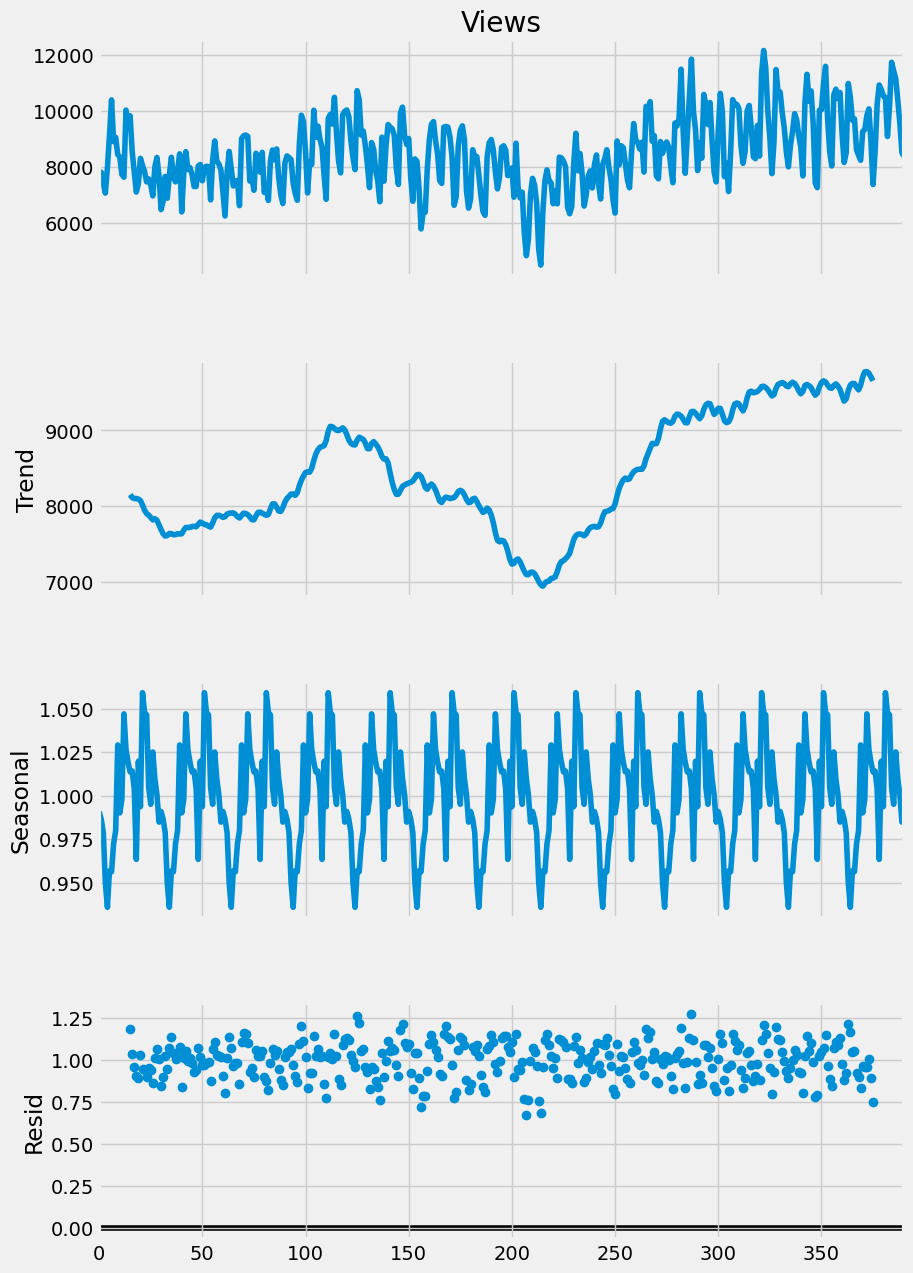

In [7]:
# Lets see if our data is seasonal or stationary:

result = seasonal_decompose(data["Views"], model="multiplicative", period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,15)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

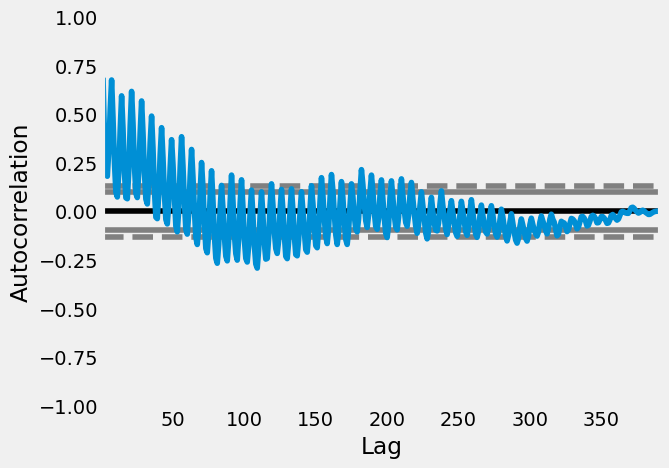

In [8]:
# As we confirmed that our data is seasonal we will use SARIMA model to predict our traffic:
# As we will use SARIMA model, we should get the q,d,p values.
# Our data is not stationary so d=1
# we will find q and p using autocorrelation and partial autocorrelation

# Autocorrelation:
pd.plotting.autocorrelation_plot(data["Views"])


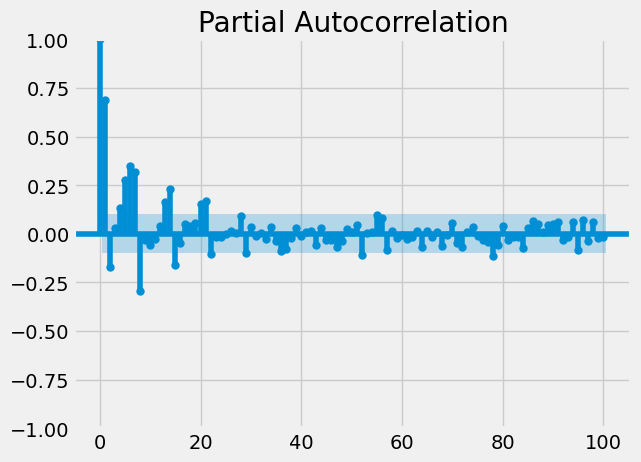

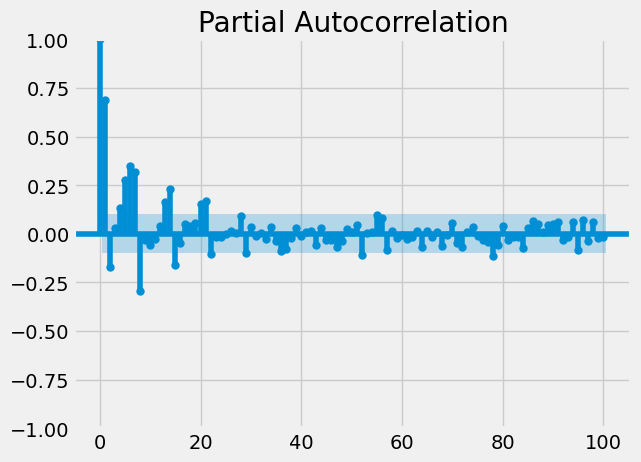

In [9]:
# partial autocorrelation:
plot_pacf(data["Views"], lags = 100)

In [10]:
# Now lets build our model SARIMA:

p,d,q = 5,1,2
model = sm.tsa.statespace.SARIMAX(data["Views"], order = (p,d,q), seasonal_order = (p,d,q,12))
model = model.fit()
print(model.summary())

C:\Users\hytham2022\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hytham2022\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3098.830
Date:                            Thu, 18 Apr 2024   AIC                           6227.660
Time:                                    20:53:25   BIC                           6286.683
Sample:                                         0   HQIC                          6251.085
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7747      0.130      5.976      0.000       0.521       1.029
ar.L2         -0.7883      0.136   

In [11]:
# Lets predict the upcoming 50 days of traffic:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9881.755634
392    10788.545815
393    10723.396655
394     9854.099484
395     8798.029464
396     8259.835914
397     8939.196672
398     9714.369114
399    10295.288296
400    10591.685924
401     9877.300350
402     9329.093264
403     9005.973829
404     9064.958141
405    10495.216695
406    10997.610314
407    10914.724320
408    10081.863120
409     9413.067634
410     8609.592770
411     9166.192866
412    10346.612552
413    10640.452779
414    10819.166572
415    10264.626031
416     9399.331790
417     8968.693521
418     9153.516869
419     9927.139866
420    10276.011646
421    10748.584615
422     9903.665388
423     9501.354336
424     8982.879396
425     8846.918600
426    10178.429295
427    10895.992374
428    10926.192056
429    10367.926406
430     9402.269446
431     8667.510953
432     8710.540332
433    10091.048074
434    10564.548935
435    10889.959214
436    10439.021199
437     9302.844995
438     9151.422690
439     9365.257904
440    10324.000955


<Axes: >

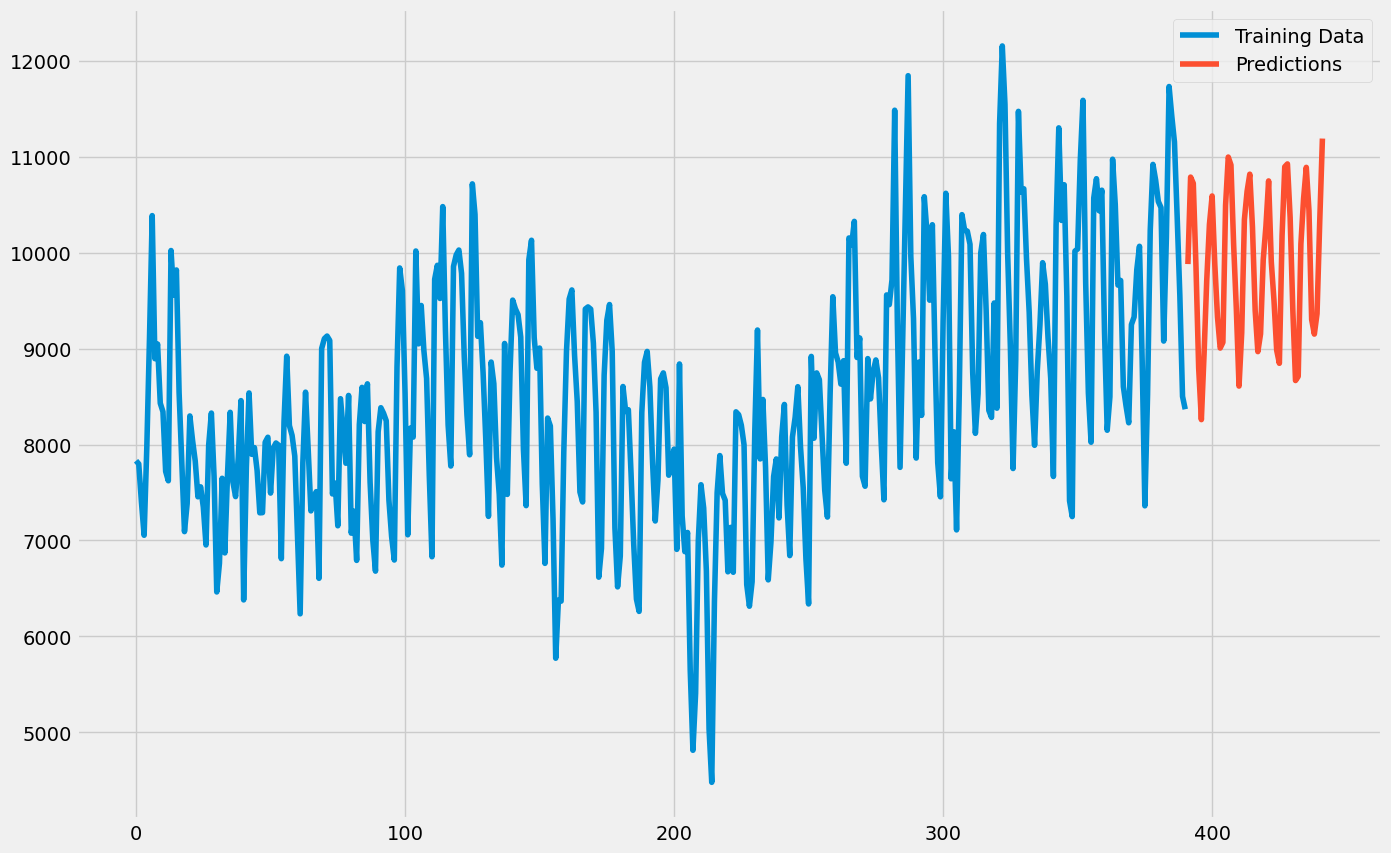

In [12]:
# Lets visualize the predictions:
data["Views"].plot(legend = True, label="Training Data", figsize=(15,10))
predictions.plot(legend= True, label="Predictions")